## 1. Drift Density Graph

1. load session logs (ORPDA) - 5 characters (Eddy Lin, John Lin, Abigail Chen, Tom Moreno, Hailey Johnson)
2. Combine to one dataframe.
3. Chart density graph using sns lineplot

In [15]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

ROOT = Path.cwd().parents[2]
print(ROOT)

LOG_DIR = ROOT / "app/logs/"
print(LOG_DIR)

/Users/jaelinlee/Documents/GitHub/Driftville_Agent
/Users/jaelinlee/Documents/GitHub/Driftville_Agent/app/logs


In [10]:
# -----------------------------------------------------
# LOAD LOGS
# -----------------------------------------------------


def load_logs(log_dir):
    rows = []
    for f in log_dir.glob("session_*.log"):
        with f.open() as fh:
            for line in fh:
                try:
                    rows.append(json.loads(line))
                except:
                    pass
    return pd.DataFrame(rows)


df = load_logs(LOG_DIR)
df

# Split ORPDA and ORPA
df_orpda = df[df["use_drift"] == True].copy()
df_orpa = df[df["use_drift"] == False].copy()
print("ORPDA: ", df_orpda.shape[0], "ORPA: ", df_orpa.shape[0], "\n")

ORPDA:  300 ORPA:  60 



In [35]:
# -----------------------------------------------------
# ORPDA drift dataframe
# -----------------------------------------------------
raw_drift_df = pd.DataFrame(
    df_orpda.apply(lambda x: x["orpda"]["drift_decision"], axis=1).to_dict()
).T
merged_df = pd.merge(
    df_orpda, raw_drift_df, left_on=df_orpda.index, right_on=raw_drift_df.index
)
persona = merged_df[merged_df.agent == "Eddy Lin"]
persona.sample(3)

,key_0,ts_created,tick,sim_time,agent,use_drift,orpda,should_drift,drift_type,drift_topic,drift_action,drift_intensity,potential_recovery,justification,datetime_start,duration_min
260,260,2025-12-06T16:23:21.738894-05:00,20,2023-02-13 11:00,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,True,internal,further exploring variations on the harmonic p...,continue,0.7,Eddy will likely return focus to the class whe...,Eddy Lin's analytical and musical tendencies n...,2023-02-13 11:00,15
261,261,2025-12-06T16:23:25.461661-05:00,21,2023-02-13 11:15,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,True,internal,further variations on the harmonic progression...,continue,0.75,Eddy will return his focus to the music theory...,Eddy's analytical and musical nature drives in...,2023-02-13 11:15,15
247,247,2025-12-06T16:22:33.406544-05:00,7,2023-02-13 07:45,Eddy Lin,True,{'observation': {'datetime_start': '2023-02-13...,False,none,,continue,0,,,2023-02-13 07:45,15


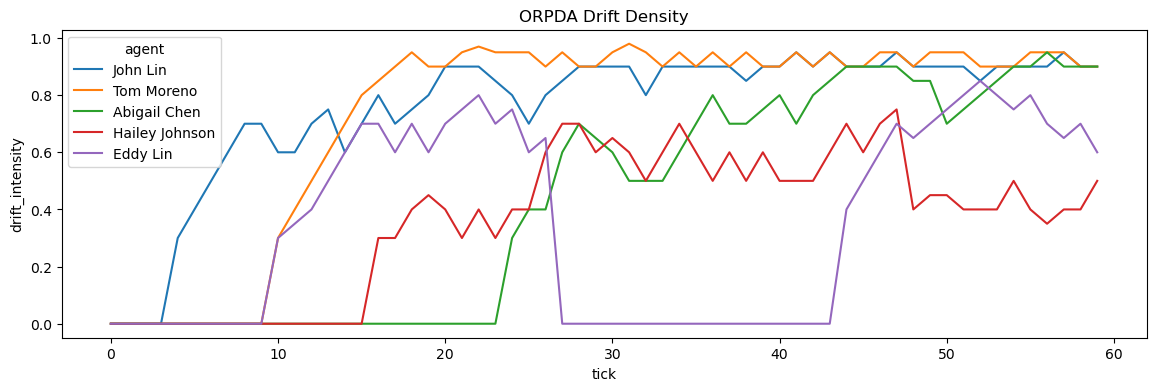

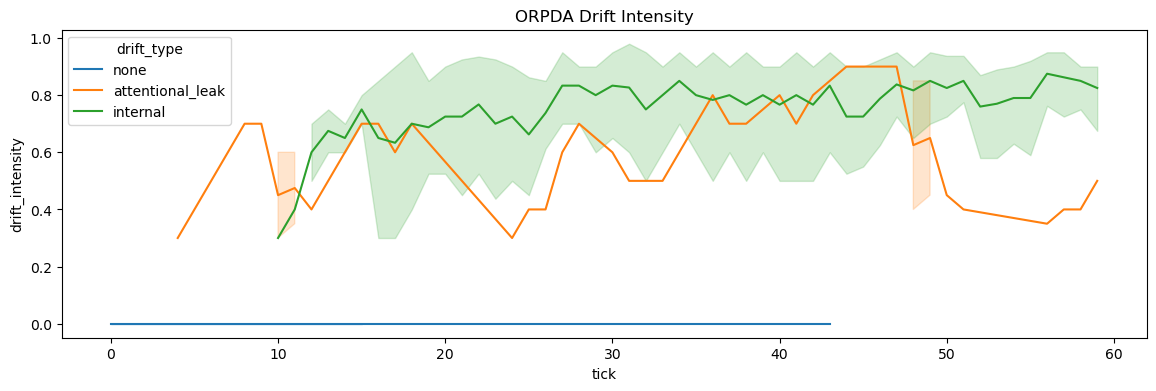

In [57]:
# -----------------------------------------------------
# Graph Drift
# -----------------------------------------------------
df = merged_df.copy()

plt.figure(figsize=(14, 4))
sns.lineplot(data=df, x="tick", y="drift_intensity", hue="agent", estimator="mean")
plt.title("ORPDA Drift Density")
plt.show()

# -----------------------------------------------------
# Graph Drift
# -----------------------------------------------------
df = merged_df.copy()

plt.figure(figsize=(14, 4))
sns.lineplot(data=df, x="tick", y="drift_intensity", hue="drift_type", estimator="mean")
plt.title("ORPDA Drift Intensity")
plt.show()